<a href="https://colab.research.google.com/github/deepakMudiraj06/UNP-Project/blob/main/RESNET50_final_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion Recommendation System Using Image features
RESNET50 MODEL
Recommending 5 similar images for the given image and Accuracy of the model

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from torch.nn.functional import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from tqdm import tqdm

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.fc = torch.nn.Identity()  # Remove the classification head
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet-specific normalization
])

# Function to extract features
def extract_features(img_path, model):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

# Load dataset images from multiple folders and extract features
def build_feature_database(image_root_folder):
    image_paths = []
    for root, _, files in os.walk(image_root_folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        raise ValueError(f"No images found in {image_root_folder}. Check your dataset path.")

    feature_dict = {}
    for img_path in tqdm(image_paths, desc="Extracting Features"):
        try:
            feature_dict[img_path] = extract_features(img_path, model)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return feature_dict

# Compute cosine similarity and recommend top 5 similar images
def recommend_similar_images(query_img_path, feature_dict):
    query_features = extract_features(query_img_path, model)
    similarities = {}
    for img_path, features in feature_dict.items():
        similarities[img_path] = sk_cosine_similarity([query_features], [features])[0][0]
    sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_images[:5]  # Top 5 similar images

# Function to evaluate recommendation accuracy
def evaluate_accuracy(feature_dict, threshold=0.85):
    if not feature_dict:
        print("Feature database is empty. Cannot evaluate accuracy.")
        return 0

    correct_recommendations = 0
    total_queries = len(feature_dict)
    for query_img in tqdm(feature_dict.keys(), desc="Evaluating Accuracy"):
        recommended_images = recommend_similar_images(query_img, feature_dict)
        correct_recommendations += sum(1 for _, score in recommended_images if score >= threshold)
    accuracy = (correct_recommendations / (total_queries * 5)) * 100
    return accuracy

# Example Usage
if __name__ == "__main__":
    image_root_folder = "/content/drive/MyDrive/fashion data1"  # Change this to your dataset root folder
    feature_database = build_feature_database(image_root_folder)
    query_image_path = "/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg"  # Change this to your test image
    recommended_images = recommend_similar_images(query_image_path, feature_database)
    print("Recommended Images:", recommended_images)
    accuracy = evaluate_accuracy(feature_database, threshold=0.85)
    print(f"Model Accuracy: {accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 41.0MB/s]
Extracting Features:  79%|███████▉  | 3371/4262 [28:56<06:48,  2.18it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in b

Error processing /content/drive/MyDrive/fashion data1/Fashion Dataset/red bangles/034_0012.png: image file is truncated


Extracting Features: 100%|██████████| 4262/4262 [36:48<00:00,  1.93it/s]


Recommended Images: [('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg', 0.99999994), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_solid-tshirts_black_round_half_sleeves/round (437).jpg', 0.9390973), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_solid-tshirts_black_round_half_sleeves/women (128).jpg', 0.9390973), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_green_round_half_sleeves/women (196).jpg', 0.9390325), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/women (140).jpg', 0.9390167)]


Evaluating Accuracy:  79%|███████▉  | 3371/4261 [2:34:16<38:30,  2.60s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy:  82%|████████▏ | 3478/4261 [2:39:01<33:43,  2.58s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy: 100%|██████████| 4261/4261 [3:13:59<00:00,  2.73s/it]

Model Accuracy: 95.09%


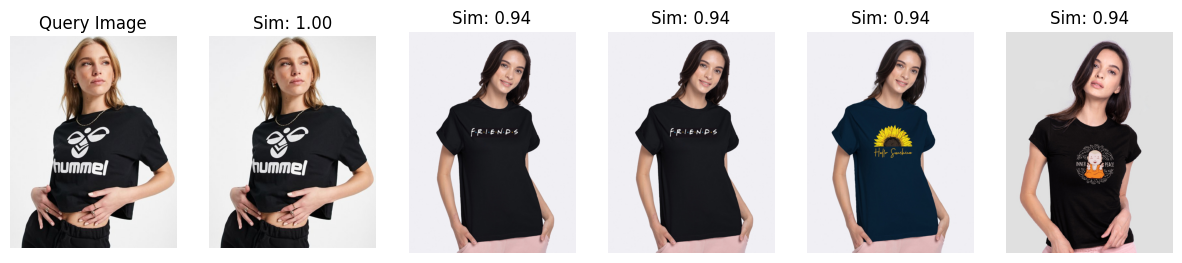

In [ ]:
import matplotlib.pyplot as plt

def display_recommendations(query_img_path, recommended_images):
    """Displays the query image along with the recommended images."""
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))

    # Show query image
    query_img = Image.open(query_img_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Show recommended images
    for i, (img_path, score) in enumerate(recommended_images):
        img = Image.open(img_path).convert("RGB")
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Sim: {score:.2f}")
        axes[i + 1].axis("off")

    plt.show()

# Example usage
display_recommendations(query_image_path, recommended_images)


In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from torch.nn.functional import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from tqdm import tqdm

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.fc = torch.nn.Identity()  # Remove the classification head
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet-specific normalization
])

# Function to extract features
def extract_features(img_path, model):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

# Load dataset images from multiple folders and extract features
def build_feature_database(image_root_folder):
    image_paths = []
    for root, _, files in os.walk(image_root_folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        raise ValueError(f"No images found in {image_root_folder}. Check your dataset path.")

    feature_dict = {}
    for img_path in tqdm(image_paths, desc="Extracting Features"):
        try:
            feature_dict[img_path] = extract_features(img_path, model)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return feature_dict

# Compute cosine similarity and recommend top 5 similar images
def recommend_similar_images(query_img_path, feature_dict):
    query_features = extract_features(query_img_path, model)
    similarities = {}
    for img_path, features in feature_dict.items():
        similarities[img_path] = sk_cosine_similarity([query_features], [features])[0][0]
    sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_images[:5]  # Top 5 similar images

# Function to evaluate recommendation accuracy
def evaluate_accuracy(feature_dict, threshold=0.85):
    if not feature_dict:
        print("Feature database is empty. Cannot evaluate accuracy.")
        return 0

    correct_recommendations = 0
    total_queries = len(feature_dict)
    for query_img in tqdm(feature_dict.keys(), desc="Evaluating Accuracy"):
        recommended_images = recommend_similar_images(query_img, feature_dict)
        correct_recommendations += sum(1 for _, score in recommended_images if score >= threshold)
    accuracy = (correct_recommendations / (total_queries * 5)) * 100
    return accuracy

# Example Usage
if __name__ == "__main__":
    image_root_folder = "/content/drive/MyDrive/fashion data1"  # Change this to your dataset root folder
    feature_database = build_feature_database(image_root_folder)
    query_image_path = "/content/drive/MyDrive/fashion data1/Fashion Dataset/yellow texture img.jpg"  # Change this to your test image
    recommended_images = recommend_similar_images(query_image_path, feature_database)
    print("Recommended Images:", recommended_images)
    accuracy = evaluate_accuracy(feature_database, threshold=0.85)
    print(f"Model Accuracy: {accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 114MB/s]
Extracting Features:  79%|███████▉  | 3436/4327 [35:14<08:49,  1.68it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

Error processing /content/drive/MyDrive/fashion data1/Fashion Dataset/red bangles/034_0012.png: image file is truncated


Extracting Features: 100%|██████████| 4327/4327 [44:48<00:00,  1.61it/s]


Recommended Images: [('/content/drive/MyDrive/fashion data1/Fashion Dataset/yellow texture img.jpg', 1.0), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_white_round_half_sleeves/long-sleeve (981).jpg', 0.55072576), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/short Golden Earing/028_046.png', 0.5422201), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/yellow_Dress/dress14119.png', 0.541468), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/yellow_Dress/dress14632.png', 0.5374286)]


Evaluating Accuracy:  79%|███████▉  | 3436/4326 [2:16:22<37:16,  2.51s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy:  82%|████████▏ | 3543/4326 [2:20:32<29:25,  2.25s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy: 100%|██████████| 4326/4326 [2:51:16<00:00,  2.38s/it]

Model Accuracy: 94.45%


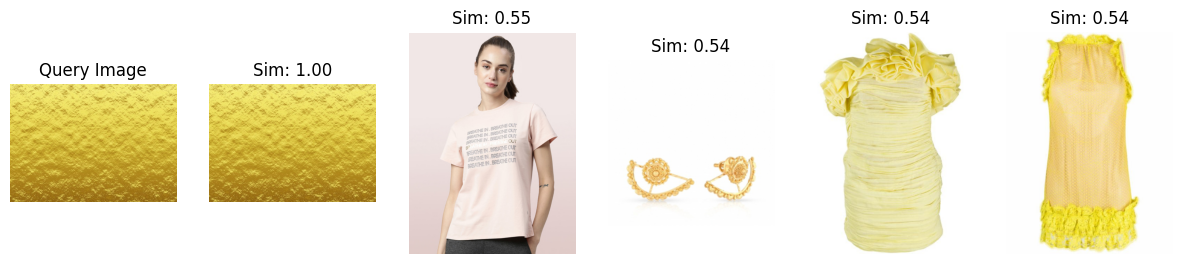

In [ ]:
import matplotlib.pyplot as plt

def display_recommendations(query_img_path, recommended_images):
    """Displays the query image along with the recommended images."""
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))

    # Show query image
    query_img = Image.open(query_img_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Show recommended images
    for i, (img_path, score) in enumerate(recommended_images):
        img = Image.open(img_path).convert("RGB")
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Sim: {score:.2f}")
        axes[i + 1].axis("off")

    plt.show()

# Example usage
display_recommendations(query_image_path, recommended_images)


In [ ]:
# ViT Model
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from torch.nn.functional import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from tqdm import tqdm
import glob

# Load a pre-trained ViT model
model = models.vit_b_16(pretrained=True)
model.heads = torch.nn.Identity()  # Remove classification head
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Function to extract features
def extract_features(img_path, model):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image)
    return features.squeeze().numpy()

# Load dataset images from multiple folders and extract features
def build_feature_database(image_root_folder):
    image_paths = []
    for root, _, files in os.walk(image_root_folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        raise ValueError(f"No images found in {image_root_folder}. Check your dataset path.")

    feature_dict = {}
    for img_path in tqdm(image_paths, desc="Extracting Features"):
        try:
            feature_dict[img_path] = extract_features(img_path, model)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return feature_dict

# Compute cosine similarity and recommend top 5 similar images
def recommend_similar_images(query_img_path, feature_dict):
    query_features = extract_features(query_img_path, model)
    similarities = {}
    for img_path, features in feature_dict.items():
        similarities[img_path] = sk_cosine_similarity([query_features], [features])[0][0]
    sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_images[:5]  # Top 5 similar images

# Function to evaluate recommendation accuracy
def evaluate_accuracy(feature_dict, threshold=0.8):
    if not feature_dict:
        print("Feature database is empty. Cannot evaluate accuracy.")
        return 0  # Return 0 instead of dividing by zero

    correct_recommendations = 0
    total_queries = len(feature_dict)
    for query_img in tqdm(feature_dict.keys(), desc="Evaluating Accuracy"):
        recommended_images = recommend_similar_images(query_img, feature_dict)
        correct_recommendations += sum(1 for _, score in recommended_images if score >= threshold)
    accuracy = (correct_recommendations / (total_queries * 5)) * 100
    return accuracy

# Example Usage
if __name__ == "__main__":
    image_root_folder = "/content/drive/MyDrive/fashion data1"  # Change this to your dataset root folder
    feature_database = build_feature_database(image_root_folder)
    query_image_path = "/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg"  # Change this to your test image
    recommended_images = recommend_similar_images(query_image_path, feature_database)
    print("Recommended Images:", recommended_images)
    accuracy = evaluate_accuracy(feature_database, threshold=0.8)0
    print(f"Model Accuracy: {accuracy:.2f}%")

Extracting Features:  93%|█████████▎| 3956/4262 [54:14<04:26,  1.15it/s]

Error processing /content/drive/MyDrive/fashion data1/Fashion Dataset/red bangles/034_0012.png: image file is truncated


Extracting Features: 100%|██████████| 4262/4262 [58:19<00:00,  1.22it/s]


Recommended Images: [('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg', 0.9999998), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_blue_round_half_sleeves/women (1044).jpg', 0.7958894), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/women (1879).jpg', 0.78267133), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_solid-tshirts_green_round_half_sleeves/women (1478).jpg', 0.77639484), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_solid-tshirts_black_round_half_sleeves/women (1958).jpg', 0.77414244)]


Evaluating Accuracy:  79%|███████▉  | 3371/4261 [2:52:04<44:44,  3.02s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy:  82%|████████▏ | 3478/4261 [2:57:35<39:51,  3.05s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy: 100%|██████████| 4261/4261 [3:37:54<00:00,  3.07s/it]

Model Accuracy: 63.78%


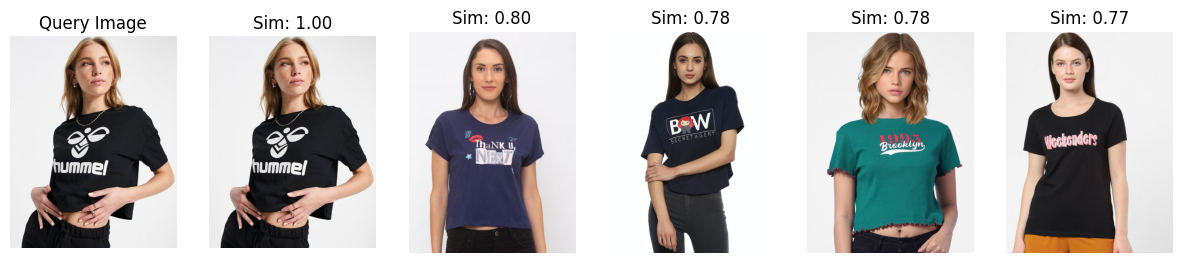

In [ ]:
import matplotlib.pyplot as plt

def display_recommendations(query_img_path, recommended_images):
    """Displays the query image along with the recommended images."""
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))

    # Show query image
    query_img = Image.open(query_img_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Show recommended images
    for i, (img_path, score) in enumerate(recommended_images):
        img = Image.open(img_path).convert("RGB")
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Sim: {score:.2f}")
        axes[i + 1].axis("off")

    plt.show()

# Example usage
display_recommendations(query_image_path, recommended_images)


In [ ]:
# VGG16 Model
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from torch.nn.functional import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from tqdm import tqdm

# Load a pre-trained VGG16 model
model = models.vgg16(pretrained=True)
model.classifier = torch.nn.Sequential(*list(model.classifier.children())[:-1])  # Remove the classification head
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # VGG16-specific normalization
])

# Function to extract features
def extract_features(img_path, model):
    image = Image.open(img_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

# Load dataset images from multiple folders and extract features
def build_feature_database(image_root_folder):
    image_paths = []
    for root, _, files in os.walk(image_root_folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        raise ValueError(f"No images found in {image_root_folder}. Check your dataset path.")

    feature_dict = {}
    for img_path in tqdm(image_paths, desc="Extracting Features"):
        try:
            feature_dict[img_path] = extract_features(img_path, model)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return feature_dict

# Compute cosine similarity and recommend top 5 similar images
def recommend_similar_images(query_img_path, feature_dict):
    query_features = extract_features(query_img_path, model)
    similarities = {}
    for img_path, features in feature_dict.items():
        similarities[img_path] = sk_cosine_similarity([query_features], [features])[0][0]
    sorted_images = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_images[:5]  # Top 5 similar images

# Function to evaluate recommendation accuracy
def evaluate_accuracy(feature_dict, threshold=0.85):
    if not feature_dict:
        print("Feature database is empty. Cannot evaluate accuracy.")
        return 0

    correct_recommendations = 0
    total_queries = len(feature_dict)
    for query_img in tqdm(feature_dict.keys(), desc="Evaluating Accuracy"):
        recommended_images = recommend_similar_images(query_img, feature_dict)
        correct_recommendations += sum(1 for _, score in recommended_images if score >= threshold)
    accuracy = (correct_recommendations / (total_queries * 5)) * 100
    return accuracy

# Example Usage
if __name__ == "__main__":
    image_root_folder = "/content/drive/MyDrive/fashion data1"  # Change this to your dataset root folder
    feature_database = build_feature_database(image_root_folder)
    query_image_path = "/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg"  # Change this to your test image
    recommended_images = recommend_similar_images(query_image_path, feature_database)
    print("Recommended Images:", recommended_images)
    accuracy = evaluate_accuracy(feature_database, threshold=0.85)
    print(f"Model Accuracy: {accuracy:.2f}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 134MB/s]
Extracting Features:  79%|███████▉  | 3371/4262 [1:00:25<16:52,  1.14s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should b

Error processing /content/drive/MyDrive/fashion data1/Fashion Dataset/red bangles/034_0012.png: image file is truncated


Extracting Features: 100%|██████████| 4262/4262 [1:16:42<00:00,  1.08s/it]


Recommended Images: [('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/768.jpg', 0.9999999), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_white_round_half_sleeves/round (2177).jpg', 0.7724373), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_blue_round_half_sleeves/long-sleeve (2198).jpg', 0.7710296), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_red_round_half_sleeves/women (356).jpg', 0.77092755), ('/content/drive/MyDrive/fashion data1/Fashion Dataset/women_tshirt_printed-tshirts_black_round_half_sleeves/printed (114).jpg', 0.7688673)]


Evaluating Accuracy:  79%|███████▉  | 3371/4261 [2:53:18<47:10,  3.18s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy:  82%|████████▏ | 3478/4261 [2:58:53<40:08,  3.08s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Evaluating Accuracy: 100%|██████████| 4261/4261 [3:39:55<00:00,  3.10s/it]

Model Accuracy: 65.17%


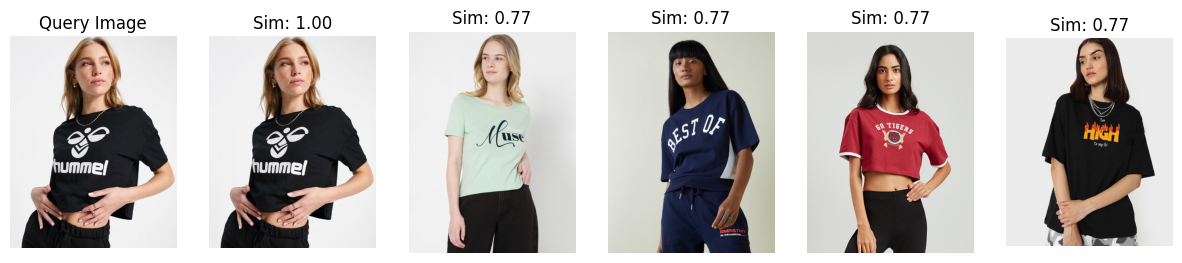

In [ ]:
import matplotlib.pyplot as plt

def display_recommendations(query_img_path, recommended_images):
    """Displays the query image along with the recommended images."""
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))

    # Show query image
    query_img = Image.open(query_img_path).convert("RGB")
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Show recommended images
    for i, (img_path, score) in enumerate(recommended_images):
        img = Image.open(img_path).convert("RGB")
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Sim: {score:.2f}")
        axes[i + 1].axis("off")

    plt.show()

# Example usage
display_recommendations(query_image_path, recommended_images)
